# Cálculo de la profundidad desarrollada

Este ejercicio tiene como objetivo calcular la longitud total de la trayectoria de un pozo sintético. La idea es conocer la filosofía de trabajo de la biblioteca Pandas de Python así como adquirir nociones básicas de graficación 2D y 3D.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [2]:
#Lectura del archivo csv
tr=pd.read_csv('survey-syn.csv')

In [3]:
tr.describe()

,TVD,XOFFSET,YOFFSET
count,112.000000,112.000000,112.000000
mean,3815.625000,394.419643,394.419643
std,2272.225873,350.496910,350.496910
min,0.000000,0.000000,0.000000
25%,1872.500000,0.000000,0.000000
50%,3815.000000,412.500000,412.500000
75%,5757.500000,775.000000,775.000000
max,7700.000000,775.000000,775.000000


In [4]:
type(tr) 

pandas.core.frame.DataFrame

### Gráfica 2D

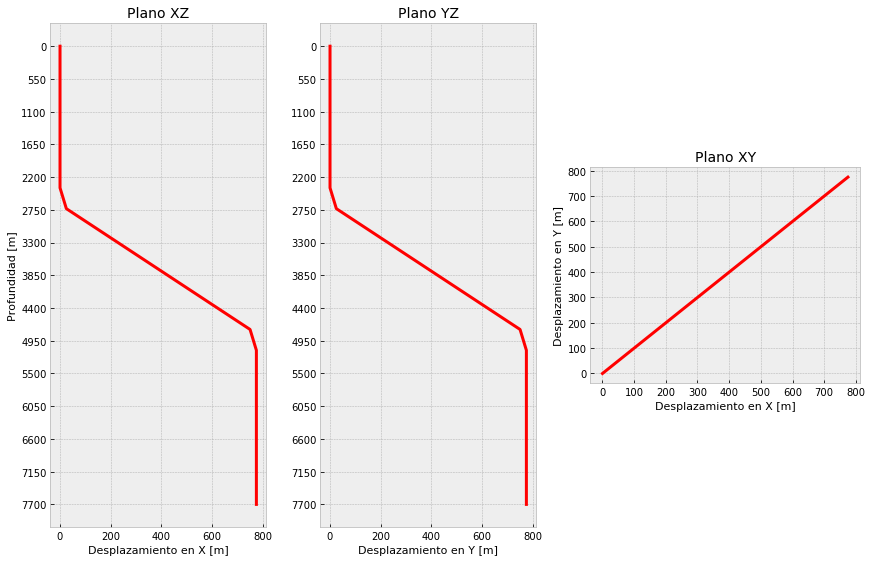

In [5]:
################################
f1 = plt.figure(figsize = [15,10])
plt.style.use('bmh')

#Plano XZ

fig1 = f1.add_axes([0, 0, 0.2,0.7]) 
fig1.plot(tr.XOFFSET, tr.TVD,'r', alpha=1, lw=3)
fig1.set_title('Plano XZ', fontsize='14')
fig1.set_ylabel('Profundidad ' + '[m]', fontsize = '11' )
fig1.set_xlabel('Desplazamiento en X '+ '[m]', fontsize = '11')
fig1.set_yticks(np.linspace (min(tr.TVD),max(tr.TVD),15) )
fig1.set_xticks( np.linspace (min(tr.XOFFSET), 800, 5))
fig1.invert_yaxis()
fig1.grid(True, alpha=1)

#Plano YZ

fig2 = f1.add_axes([0.25, 0, 0.2,0.7]) 
fig2.plot(tr.YOFFSET, tr.TVD,'r', alpha=1, lw=3)
fig2.set_title('Plano YZ', fontsize='14')
fig2.set_xlabel('Desplazamiento en Y '+ '[m]', fontsize = '11')
fig2.set_yticks(np.linspace (min(tr.TVD),max(tr.TVD),15) )
fig2.set_xticks( np.linspace (min(tr.XOFFSET), 800, 5))
fig2.invert_yaxis()
fig2.grid(True, alpha=1)

#Plano XY

fig3 = f1.add_axes([0.50, 0.2, 0.25,0.3]) 
fig3.plot(tr.YOFFSET, tr.XOFFSET,'r', alpha=1, lw=3)
fig3.set_title('Plano XY', fontsize='14')
fig3.set_ylabel('Desplazamiento en Y ' + '[m]', fontsize = '11' )
fig3.set_xlabel('Desplazamiento en X '+ '[m]', fontsize = '11')
fig3.grid(True, alpha=1)

plt.show()

### Gráfica 3D

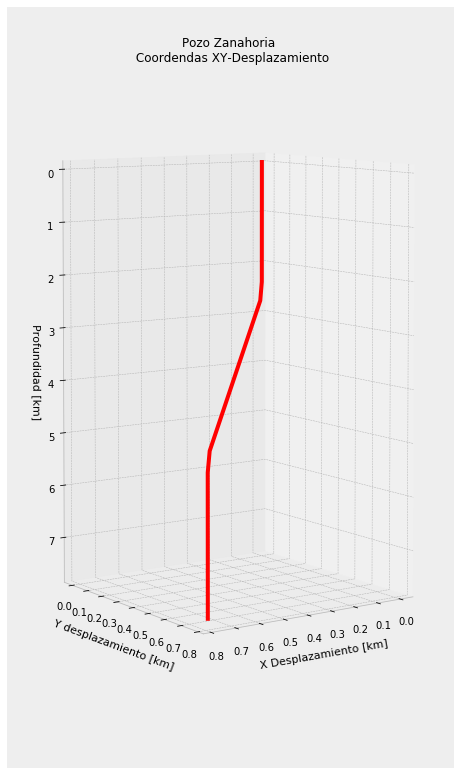

In [6]:
fig = plt.figure(figsize=[8, 14])
mpl.rcParams['legend.fontsize'] = 10
fig4 = fig.gca(projection='3d')

fig4.plot(tr.XOFFSET/1000,tr.YOFFSET/1000,tr.TVD/1000,  'r', lw=4)
fig4.set_title("Pozo Zanahoria \n Coordendas XY-Desplazamiento", color= "K",fontsize= 12)
fig4.invert_zaxis()
fig4.invert_xaxis()
fig4.invert_yaxis()
fig4.set_xlabel('X Desplazamiento [km]' , fontsize=11)
fig4.set_ylabel('Y desplazamiento [km]' , fontsize=11)
fig4.set_zlabel('Profundidad [km]', fontsize=11)

fig4.view_init(elev=5, azim=-125)

#plt.savefig('survey3D.png', transparent=True, dpi=600, bbox_inches="tight" )


plt.show()

### Cálculo de los valores absolutos de las coordenas X y Y

Las coordenadas de superficie son: X-300100 Y-5000100

In [7]:
xsup=300100 
ysup=5000100

XABS = xsup + tr.XOFFSET
YABS = ysup + tr.YOFFSET

### Cálculo de la profundidad medida (MD, measure depth)

#### Cálculo del desplazamiento en el plano XY
A través del teorema de Pitágoras calculamos la hipotenusa del plano horizontal (XY) y el plano vertical.

In [8]:
delta_xoffset = np.diff(tr.XOFFSET) #Diferencia del desplazamiento de X-OFFSET
delta_yoffset = np.diff(tr.YOFFSET) #Diferencia del desplazamiento de Y-OFFSET
deltaz_tvd = np.diff(tr.TVD) #Diferencia de la TVD

In [9]:
delta_xy=np.sqrt(pow(delta_xoffset, 2)+pow(delta_yoffset,2)) #Hipotenusa en el plano XY
delta_z_xy = np.sqrt(pow(delta_xy,2)+pow(deltaz_tvd,2)) #Hipotenusa en el plano Z-XY

In [10]:
MD = np.round (np.cumsum(delta_z_xy),3)   #Cálculo de la suma acumulada de las diferencias en el plano Z-XY

#### Escalar el "dataframe" tr

In [11]:
tr_md = tr.iloc[ 1 : 112 , :]

In [12]:
print (len(tr_md)) ; print (len(MD))

111
111


### Integrar los datos calculados en la tabla de datos original

In [13]:
tr_tot = tr_md.assign(XABS=XABS, YABS=YABS, MD=MD)

In [14]:
print(tr_tot)

        TVD  XOFFSET  YOFFSET        MD      XABS       YABS
1       0.0      0.0      0.0     0.000  300100.0  5000100.0
2      70.0      0.0      0.0    70.000  300100.0  5000100.0
3     140.0      0.0      0.0   140.000  300100.0  5000100.0
4     210.0      0.0      0.0   210.000  300100.0  5000100.0
5     280.0      0.0      0.0   280.000  300100.0  5000100.0
6     350.0      0.0      0.0   350.000  300100.0  5000100.0
7     420.0      0.0      0.0   420.000  300100.0  5000100.0
8     490.0      0.0      0.0   490.000  300100.0  5000100.0
9     560.0      0.0      0.0   560.000  300100.0  5000100.0
10    630.0      0.0      0.0   630.000  300100.0  5000100.0
11    700.0      0.0      0.0   700.000  300100.0  5000100.0
12    770.0      0.0      0.0   770.000  300100.0  5000100.0
13    840.0      0.0      0.0   840.000  300100.0  5000100.0
14    910.0      0.0      0.0   910.000  300100.0  5000100.0
15    980.0      0.0      0.0   980.000  300100.0  5000100.0
16   1050.0      0.0    

### Exportar la tabla en formato CSV

In [15]:
tr_tot.to_csv('Ejercicio-MD.csv', index=False, header=True)